Cámara abierta. Presiona 's' para guardar una foto o 'q' para salir.
¡Foto guardada como foto_conlentes.jpg!


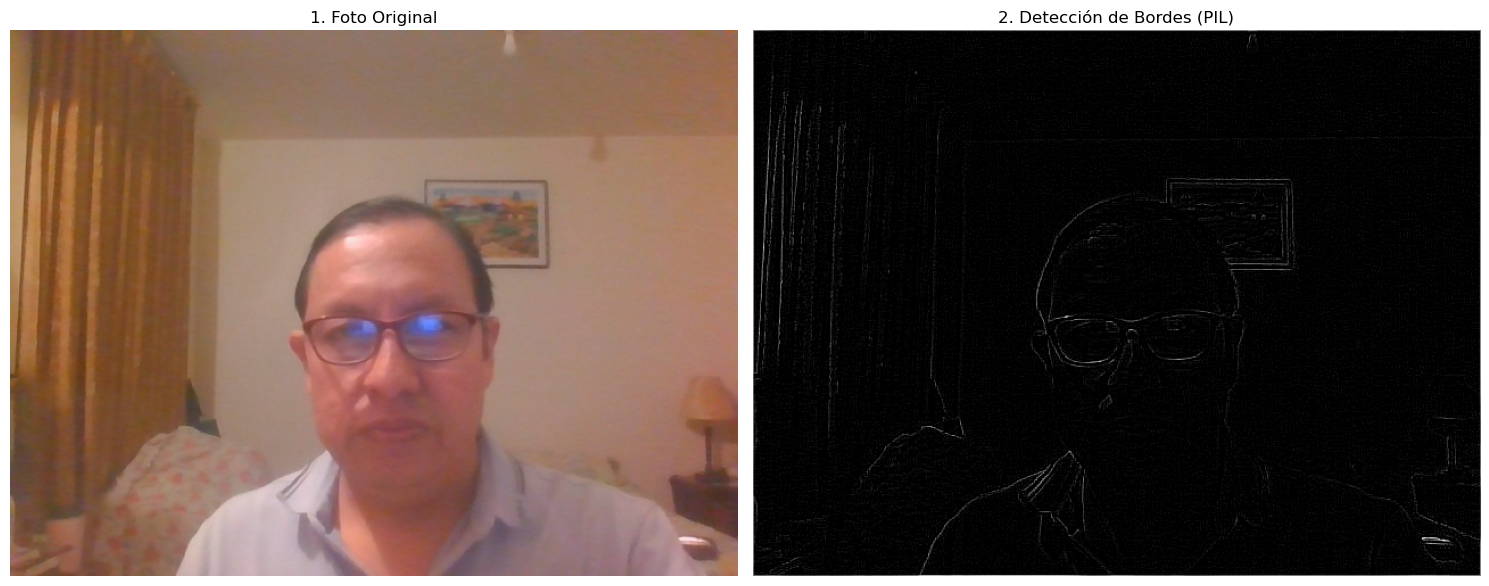

In [6]:
import cv2                 # Solo para la parte de la cámara
from PIL import Image
import matplotlib.pyplot as plt

# PASO 1: CAPTURA (Pillow no hace esta parte)
# 1.1 Inicializar la cámara (0 es la cámara por defecto)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: No se pudo acceder a la cámara.")
else:
    print("Cámara abierta. Presiona 's' para guardar una foto o 'q' para salir.")

    while True:
        # 1.2. Leer un frame de la cámara
        ret, frame = cap.read()

        if not ret:
            print("Error al capturar el video.")
            break

        # 1.3. Mostrar el video en vivo en una ventana
        cv2.imshow('Presiona S para tomar foto', frame)

        # 1.4. Escuchar el teclado
        key = cv2.waitKey(1) & 0xFF

        if key == ord('s'):  # Si presiona 's', guarda la imagen
            nombre_foto = "foto_conlentes.jpg"
            cv2.imwrite(nombre_foto, frame)
            print(f"¡Foto guardada como {nombre_foto}!")
            break
        
        elif key == ord('q'):  # Si presiona 'q', sale sin guardar
            break

    # 1.5. Liberar la cámara y cerrar ventanas
    cap.release()
    cv2.destroyAllWindows()

# PASO 2: CARGA DE IMAGEN Y PROCESAMIENTO (Con Pillow)
# 2-1. Cargar la imagen 
img_original = Image.open("foto_conlentes.jpg")

# 2.2. Procesamiento para detectar lentes y silueta
img_gris = img_original.convert("L")

# Aplicamos el filtro de detección de bordes
img_bordes = img_gris.filter(ImageFilter.FIND_EDGES)


# 3. Visualización lado a lado
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Izquierda: Original
axs[0].imshow(img_original)
axs[0].set_title("1. Foto Original")
axs[0].axis('off')

# Derecha: Bordes (Lentes y Silueta)
axs[1].imshow(img_bordes, cmap='gray')
axs[1].set_title("2. Detección de Bordes (PIL)")
axs[1].axis('off')

plt.tight_layout()
plt.show()